# TESTING

In [88]:
# Consts

API_KEY = "9489b7a6-fa4f-423e-8596-8ce5b3a74cb0"

DATASET_NAME_1 = "Cats from Pixabay"

NEW_DATASET_NAME_1 = "My First Dataset"

PROJECT_NAME_1 = "Cats"
PROJECT_NAME_2 = "Empty Project"
PROJECT_NAME_3 = "Dummy Project"


IMAGE_URL_CATS_1 = "https://cdn.pixabay.com/photo/2017/06/12/19/02/cat-2396473__480.jpg"
IMAGE_URL_CATS_2 = "https://cdn.pixabay.com/photo/2015/06/03/13/13/cats-796437__480.jpg"
IMAGE_URL_CATS_3 = "https://cdn.pixabay.com/photo/2012/11/26/13/58/cat-67345__480.jpg"
IMAGE_URL_CATS_4 = "https://cdn.pixabay.com/photo/2014/09/18/20/17/cat-451377__480.jpg"
IMAGE_URL_CATS_5 = "https://cdn.pixabay.com/photo/2015/01/31/12/36/cat-618470__480.jpg"

IMAGE_SEARCH_STRING_1 = "cat-2396473__480.jpg"
IMAGE_SEARCH_STRING_REGEX_1 = ".*cat-2.*"

In [1]:
from datagym import Client

### Create a Client
#### Client success:

In [3]:
client = Client(api_key=API_KEY)

#### Client fail:
    raise: InvalidTokenException
   

In [4]:
client = Client(api_key=API_KEY + "too much token")

InvalidTokenException: HTTP 500 | Message: "Unauthorized. None or invalid credentials."

## Projects
### Get Projects

In [7]:
projects = client.get_projects()

print(f'You have {len(projects)} Projects!')

You have 3 Projects!


### Get Project By Name

In [21]:
project_1 = client.get_project_by_name(PROJECT_NAME_1)

print(project)

<Project {'id': 'b0067ebb-4c07-45b0-8c82-032f58088b1a', 'name': 'Cats', 'short_description': 'Labeling Cats Task', 'timestamp': '1583830301307', 'label_config_id': 'f715db25-8dcd-4e60-9698-8ea5afc10e7b', 'label_iteration_id': '5aa7ca31-2118-423f-8140-3dc35fddf127', 'owner': '3360f10f-a5ab-48a6-966c-cdba2d63116a', 'datasets': <List[Dataset] with 1 elements>}>


### Get Dataset from Project

In [22]:
dataset_1 = project_1.get_dataset_by_name(dataset_name=DATASET_NAME_1)

print(dataset_1)

<Dataset {'id': '8d1a38d5-532e-4dd5-a5a3-b8356afb6c19', 'name': 'Cats from Pixabay', 'short_description': 'None', 'timestamp': '1583830330374', 'owner': '3360f10f-a5ab-48a6-966c-cdba2d63116a', 'images': <List[Image] with 2330 elements>}>


### Get Images by Name from a Project
<p> with a precise search term: returns images if search_term == image_name:</p>

In [26]:
images_1 = project_1.get_images_by_name(IMAGE_SEARCH_STRING_1)

print(f'Found {len(images_1)} Images for search term \'{IMAGE_SEARCH_STRING_1}\'')

Found 2 Images for search term 'cat-2396473__480.jpg'


<br />
With a regular expression: returns images if search_term matches image_name:

In [33]:
images_regex_1 = project_1.get_images_by_name(IMAGE_SEARCH_STRING_REGEX_1, regex=True)

print(f'Found {len(images_regex_1)} Images for search term \'{IMAGE_SEARCH_STRING_REGEX_1}\' in Project \'{project_1.name}\'\n')
print(images_regex_1[:2])

Found 394 Images for search term '.*cat-2.*' in Project 'Cats'

[<Image {'id': '9f59e157-cd43-43ac-b998-4197bbe401db', 'image_name': 'cat-2144133__480.jpg', 'image_type': 'SHAREABLE_LINK', 'timestamp': 1583831745119}>, <Image {'id': '62be520b-e513-44a5-931b-b123a9068aeb', 'image_name': 'cat-2393308__480.jpg', 'image_type': 'SHAREABLE_LINK', 'timestamp': 1583831714382}>]


## Datasets
### Get Datasets

In [34]:
datasets = client.get_datasets()

print(f'You have {len(datasets)} Datasets!')

You have 11 Datasets!


### Get Datasets by Name

In [35]:
dataset_1 = client.get_dataset_by_name(DATASET_NAME_1)

print(dataset_1)

<Dataset {'id': '8d1a38d5-532e-4dd5-a5a3-b8356afb6c19', 'name': 'Cats from Pixabay', 'short_description': 'None', 'timestamp': '1583830330374', 'owner': '3360f10f-a5ab-48a6-966c-cdba2d63116a', 'images': <List[Image] with 2330 elements>}>


### Get Images by Name within a Dataset
<p> with a precise search term: returns images if search_term == image_name:</p>

In [36]:
images_1 = dataset_1.get_images_by_name(IMAGE_SEARCH_STRING_1)

print(f'Found {len(images_1)} Images for search term \'{IMAGE_SEARCH_STRING_1}\' in Dataset \'{dataset_1.name}\'')

Found 2 Images for search term 'cat-2396473__480.jpg' in Dataset 'Cats from Pixabay'


<br />
With a regular expression: returns images if search_term matches image_name:

In [37]:
images_regex_1 = dataset_1.get_images_by_name(IMAGE_SEARCH_STRING_REGEX_1, regex=True)

print(f'Found {len(images_regex_1)} Images for search term \'{IMAGE_SEARCH_STRING_REGEX_1}\' in Dataset \'{dataset_1.name}\'\n')
print(images_regex_1[:2])

Found 394 Images for search term '.*cat-2.*' in Dataset 'Cats from Pixabay'

[<Image {'id': '36dadfba-2d25-4750-affc-4310b8b55185', 'image_name': 'cat-2393308__480.jpg', 'image_type': 'SHAREABLE_LINK', 'timestamp': 1583831710571}>, <Image {'id': '3920645e-a6d8-4884-9875-c7b0aa57ff23', 'image_name': 'cat-232960__480.jpg', 'image_type': 'SHAREABLE_LINK', 'timestamp': 1583831695116}>]


### Create Dataset 

In [39]:
owner_id = project.owner
new_dataset_1 = client.create_dataset(name=NEW_DATASET_NAME_1, 
                                      owner=owner_id,
                                      short_description="This is Optional"
                                     )
print(new_dataset_1)

<Dataset {'id': 'fe810255-ae2a-4ce2-b28c-2a023f6f6e05', 'name': 'My First Dataset', 'short_description': 'This is Optional', 'timestamp': '1584710883613', 'owner': '3360f10f-a5ab-48a6-966c-cdba2d63116a', 'images': <List[Image] with 0 elements>}>


#### Upload Images to Dataset:

You can add as many images to your new Dataset as you want!

In [53]:
import pprint
images_to_upload = set([IMAGE_URL_CATS_1, IMAGE_URL_CATS_2, IMAGE_URL_CATS_3])

images_created = client.create_images_from_urls(dataset_id=new_dataset_1.id,
                                                image_url_set=images_to_upload)

pprint.pprint(images_created)

[{'imageUploadStatus': 'SUCCESS',
  'imageUrl': 'https://cdn.pixabay.com/photo/2015/06/03/13/13/cats-796437__480.jpg'},
 {'imageUploadStatus': 'SUCCESS',
  'imageUrl': 'https://cdn.pixabay.com/photo/2017/06/12/19/02/cat-2396473__480.jpg'},
 {'imageUploadStatus': 'SUCCESS',
  'imageUrl': 'https://cdn.pixabay.com/photo/2012/11/26/13/58/cat-67345__480.jpg'}]


#### Download Images from your Dataset:

You can also download Images from your Datasets

In [64]:
# Get the latest version of your new dataset

new_dataset_1 = client.get_dataset_by_name(NEW_DATASET_NAME_1) 
img_1 = new_dataset_1.images[0]

print(f'Your Dataset has {len(new_dataset_1.images)} Images!')
print(f'Let\'s take the first image named \'{img_1.image_name}\'')

Your Dataset has 3 Images!
Let's take the first image named 'cats-796437__480.jpg'


<br />
<p>Download your Image directly into your application</p>

In [65]:
img_bytes_1 = client.download_image_bytes(image=img_1)

<br />
<p> Now you can process your images as you like! </p>

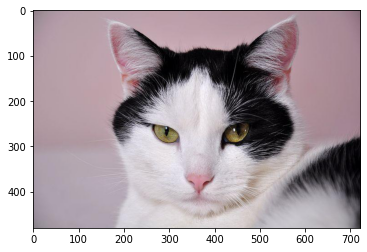

In [66]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import io

image = Image.open(io.BytesIO(img_bytes_1))
%matplotlib inline
#image.show()
imshow(np.asarray(image))

... or download the image directly to your storage:

In [67]:
client.download_image(image=new_dataset_1.images[0], file_path="")

#### Delete Images from Datasets

In [83]:
new_dataset_1 = client.get_dataset_by_name(NEW_DATASET_NAME_1) 
img_2 = new_dataset_1.images[2]

delete_success = client.delete_image(image_id=img_2.id)


print(f'Before Delete: Your Dataset has {len(new_dataset_1.images)} Images!')
new_dataset_1 = client.get_dataset_by_name(NEW_DATASET_NAME_1) 
print(f'After Delete: Your Dataset has {len(new_dataset_1.images)} Images!')

Before Delete: Your Dataset has 3 Images!
After Delete: Your Dataset has 2 Images!


### Add Datasets to your Projects

Now that you have created your first dataset we can add it to a Project 

In [79]:
new_dataset_1 = client.get_dataset_by_name(NEW_DATASET_NAME_1) 
empty_project = client.get_project_by_name(PROJECT_NAME_2)

print(f'Your Project has {len(empty_project.datasets)} connected Datasets.')

added_success = client.add_dataset(dataset_id=new_dataset_1.id,
                                   project_id=empty_project.id)

Your Project has 1 connected Datasets.


Don't forget to fetch your Project again with the Client to get the latest updates

In [76]:
empty_project = client.get_project_by_name(PROJECT_NAME_2)

print(f'Now your Project has {len(empty_project.datasets)} connected Datasets.')

Now your Project has 2 connected Datasets.


### Remove Datasets from your Projects

You can also remove these Datasets from you Projects

In [80]:
new_dataset_1 = client.get_dataset_by_name(NEW_DATASET_NAME_1) 
empty_project = client.get_project_by_name(PROJECT_NAME_2)

removed_success = client.remove_dataset(dataset_id=new_dataset_1.id,
                                        project_id=empty_project.id)

empty_project = client.get_project_by_name(PROJECT_NAME_2) # fetch to get the latest updates
print(f'Your Project has {len(empty_project.datasets)} connected Datasets.')

Your Project has 1 connected Datasets.


## Export Labels

You can export and process your labeled data from your Projects within seconds 

In [100]:
project_2 = client.get_project_by_name("Dummy_Project")

exported_labels = client.export_labels(project_id=project_2.id)

print(f'This project has {len(exported_labels) - 1} labeled Images')

This project has 2 labeled Images


You can also generate a URL to download the .json-file via your Browser:

In [104]:
exported_labels_url = client.export_labels_url(project_id=project_2.id)

print(f'Click to download: {exported_labels_url}')

Click to download: http://localhost:8080/api/v1/export/b1f53633-f3aa-4f9a-9195-a9a651f739df?token=9489b7a6-fa4f-423e-8596-8ce5b3a74cb0


### Keep your en.json up-to-date!

In [72]:
a = "The current {{p0}} already contains this {{p1}}.".replace("{{", "{").replace("}}", "}")
a = re.sub("{..}", "{}", a)
print(a)
print(a.format("o", "k"))

The current {} already contains this {}.
The current o already contains this k.
